In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

# импорт модулей
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [ ]:
# загрузка датасета
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Shape of X train: (60000, 28, 28)
Shape of y train: (60000,)


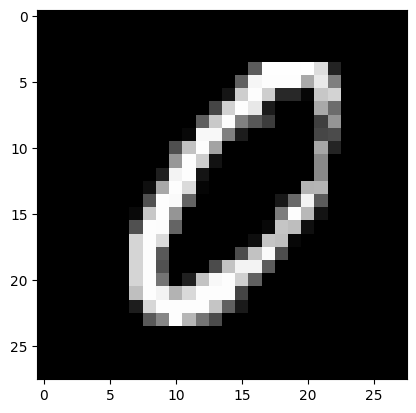

0
Shape of transformed X train: (60000, 784)


In [ ]:
# создание своего разбиения датасета
from sklearn.model_selection import train_test_split
# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
# разбиваем по вариантам
X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size = 10000,
 train_size = 60000,
 random_state = 3)

# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)

# вывод изображения
plt.imshow(X_train[123], cmap=plt.get_cmap('gray'))
plt.show()
# вывод метки для этого изображения
print(y_train[123])

# развернем каждое изображение 28*28 в вектор 784
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels) / 255
X_test = X_test.reshape(X_test.shape[0], num_pixels) / 255
print('Shape of transformed X train:', X_train.shape)

In [ ]:
# переведем метки в one-hot
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('Shape of transformed y train:', y_train.shape)
num_classes = y_train.shape[1]


Shape of transformed y train: (60000, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# 1. создаем модель - объявляем ее объектом класса Sequential
model_1 = Sequential()
# 2. добавляем первый скрытый слой
model_1.add(Dense(units=num_classes, input_dim=num_pixels, activation='softmax'))
# 3. компилируем модель
model_1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [ ]:
model_2 = Sequential()
model_2.add(Dense(units=100, input_dim=num_pixels, activation='sigmoid'))
model_2.add(Dense(units=10, activation='softmax'))
model_2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model_3 = Sequential()
model_3.add(Dense(units=300, input_dim=num_pixels, activation='sigmoid'))
model_3.add(Dense(units=10, activation='softmax'))
model_3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model_4 = Sequential()
model_4.add(Dense(units=500, input_dim=num_pixels, activation='sigmoid'))
model_4.add(Dense(units=10, activation='softmax'))
model_4.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model_5 = Sequential()
model_5.add(Dense(units=1000, input_dim=num_pixels, activation='sigmoid'))
model_5.add(Dense(units=10, activation='softmax'))
model_5.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
# вывод информации об архитектуре модели
print(model_1.summary())


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# Обучаем модель
H = model_1.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size = 512)


Epoch 1/100
106/106 [==============================] - 1s 6ms/step - loss: 1.9250 - accuracy: 0.4185 - val_loss: 1.5678 - val_accuracy: 0.6713
Epoch 2/100
106/106 [==============================] - 0s 4ms/step - loss: 1.3470 - accuracy: 0.7328 - val_loss: 1.1939 - val_accuracy: 0.7633
Epoch 3/100
106/106 [==============================] - 0s 4ms/step - loss: 1.0723 - accuracy: 0.7896 - val_loss: 0.9973 - val_accuracy: 0.7953
Epoch 4/100
106/106 [==============================] - 0s 4ms/step - loss: 0.9187 - accuracy: 0.8134 - val_loss: 0.8780 - val_accuracy: 0.8167
Epoch 5/100
106/106 [==============================] - 0s 4ms/step - loss: 0.8214 - accuracy: 0.8280 - val_loss: 0.7983 - val_accuracy: 0.8287
Epoch 6/100
106/106 [==============================] - 1s 5ms/step - loss: 0.7538 - accuracy: 0.8370 - val_loss: 0.7406 - val_accuracy: 0.8383
Epoch 7/100
106/106 [==============================] - 1s 5ms/step - loss: 0.7040 - accuracy: 0.8445 - val_loss: 0.6969 - val_accuracy: 0.8443

In [ ]:
print(model_2.summary())
H_2 = model_2.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size = 512)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
106/106 [==============================] - 1s 6ms/step - loss: 2.2737 - accuracy: 0.2461 - val_loss: 2.1759 - val_accuracy: 0.4053
Epoch 2/100
106/106 [==============================] - 0s 4ms/step - loss: 2.1154 - accuracy: 0.4824 - val_loss: 2.0587 - val_accuracy: 0.5275
Epoch 3/100
106/106 [==============================] - 1s 5ms/step - loss: 1.9985 - accuracy: 0.5886 - val_loss: 1.9459 - val_accuracy: 0.6305
Epoch 4/100


In [ ]:
print(model_3.summary())
H_3 = model_3.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size = 512)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 300)               235500    
                                                                 
 dense_21 (Dense)            (None, 10)                3010      
                                                                 
Total params: 238510 (931.68 KB)
Trainable params: 238510 (931.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/100
106/106 [==============================] - 1s 8ms/step - loss: 2.2161 - accuracy: 0.2885 - val_loss: 2.1341 - val_accuracy: 0.4355
Epoch 2/100
106/106 [==============================] - 1s 6ms/step - loss: 2.0568 - accuracy: 0.5167 - val_loss: 1.9891 - val_accuracy: 0.5553
Epoch 3/100
106/106 [==============================] - 1s 6ms/step - loss: 1.9142 - accuracy: 0.6113 - val_loss: 1.853

In [ ]:
print(model_4.summary())
H_4 = model_4.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size = 512)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 500)               392500    
                                                                 
 dense_23 (Dense)            (None, 10)                5010      
                                                                 
Total params: 397510 (1.52 MB)
Trainable params: 397510 (1.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/100
106/106 [==============================] - 2s 9ms/step - loss: 2.2418 - accuracy: 0.2829 - val_loss: 2.1444 - val_accuracy: 0.4955
Epoch 2/100
106/106 [==============================] - 1s 6ms/step - loss: 2.0577 - accuracy: 0.5601 - val_loss: 1.9808 - val_accuracy: 0.5953
Epoch 3/100
106/106 [==============================] - 1s 7ms/step - loss: 1.8976 - accuracy: 0.6476 - val_loss: 1.8292 - 

In [ ]:
print(model_5.summary())
H_5 = model_5.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size = 512)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1000)              785000    
                                                                 
 dense_25 (Dense)            (None, 10)                10010     
                                                                 
Total params: 795010 (3.03 MB)
Trainable params: 795010 (3.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/100
106/106 [==============================] - 1s 7ms/step - loss: 2.2092 - accuracy: 0.3439 - val_loss: 2.1067 - val_accuracy: 0.4565
Epoch 2/100
106/106 [==============================] - 1s 5ms/step - loss: 2.0064 - accuracy: 0.6123 - val_loss: 1.9238 - val_accuracy: 0.6783
Epoch 3/100
106/106 [==============================] - 1s 6ms/step - loss: 1.8294 - accuracy: 0.6898 - val_loss: 1.7574 - 

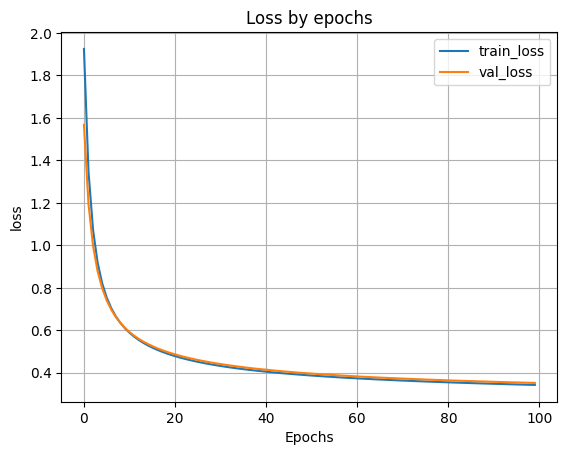

In [ ]:
# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()


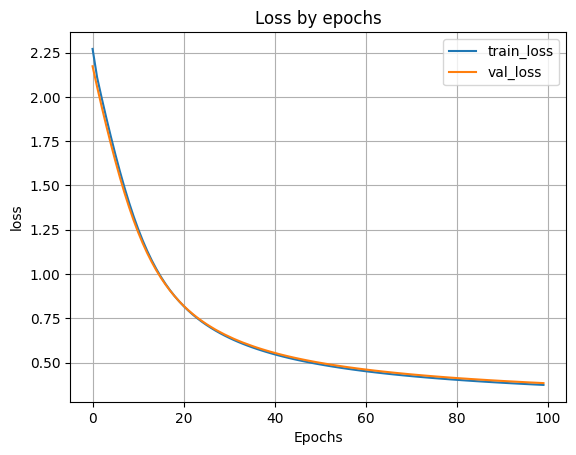

In [ ]:
# вывод графика ошибки по эпохам
plt.plot(H_2.history['loss'])
plt.plot(H_2.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

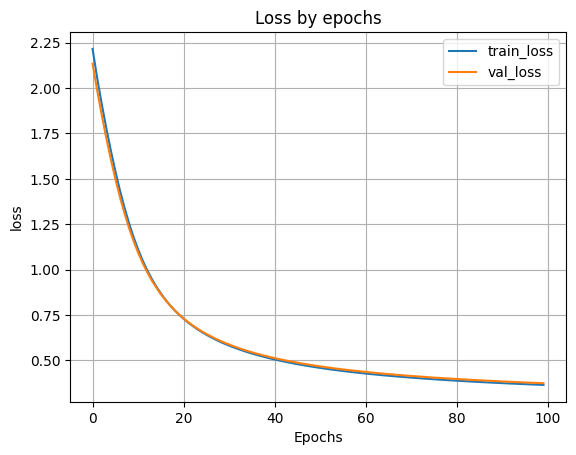

In [ ]:
# вывод графика ошибки по эпохам
plt.plot(H_3.history['loss'])
plt.plot(H_3.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

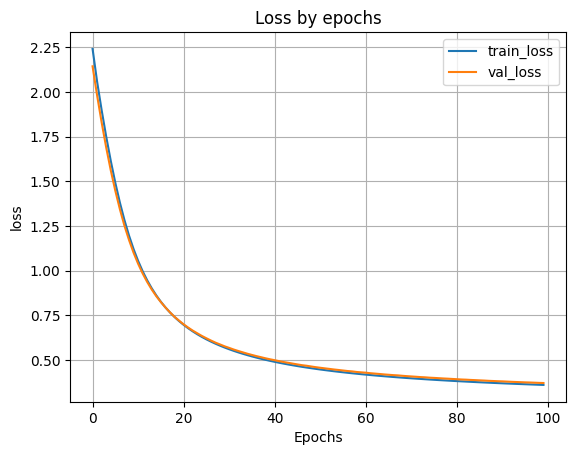

In [ ]:
# вывод графика ошибки по эпохам
plt.plot(H_4.history['loss'])
plt.plot(H_4.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

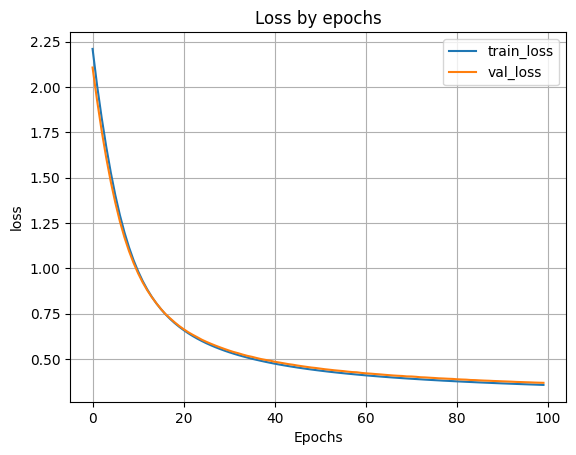

In [ ]:
# вывод графика ошибки по эпохам
plt.plot(H_5.history['loss'])
plt.plot(H_5.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [ ]:
# Оценка качества работы модели на тестовых данных
scores_1 = model_1.evaluate(X_test, y_test)
print('Loss on test data:', scores_1[0])
print('Accuracy on test data:', scores_1[1])


313/313 [==============================] - 1s 2ms/step - loss: 0.3450 - accuracy: 0.9048
Loss on test data: 0.3450338542461395
Accuracy on test data: 0.9047999978065491


In [ ]:
# Оценка качества работы модели на тестовых данных
scores_2 = model_2.evaluate(X_test, y_test)
print('Loss on test data:', scores_2[0])
print('Accuracy on test data:', scores_2[1])


313/313 [==============================] - 1s 4ms/step - loss: 2.5054 - accuracy: 0.1093
Loss on test data: 2.50537371635437
Accuracy on test data: 0.10930000245571136


In [ ]:
# Оценка качества работы модели на тестовых данных
scores_4 = model_4.evaluate(X_test, y_test)
print('Loss on test data:', scores_4[0])
print('Accuracy on test data:', scores_4[1])


313/313 [==============================] - 1s 4ms/step - loss: 0.3626 - accuracy: 0.8986
Loss on test data: 0.3625850975513458
Accuracy on test data: 0.8985999822616577


In [ ]:
scores_3 = model_3.evaluate(X_test, y_test)
print('Loss on test data:', scores_3[0])
print('Accuracy on test data:', scores_3[1])


313/313 [==============================] - 1s 3ms/step - loss: 0.3656 - accuracy: 0.8978
Loss on test data: 0.365553081035614
Accuracy on test data: 0.8978000283241272


In [ ]:
scores_5 = model_5.evaluate(X_test, y_test)
print('Loss on test data:', scores_5[0])
print('Accuracy on test data:', scores_5[1])


313/313 [==============================] - 1s 4ms/step - loss: 0.3604 - accuracy: 0.8978
Loss on test data: 0.36036133766174316
Accuracy on test data: 0.8978000283241272


**РЕЗУЛЬТАТЫ ИССЛЕДОВАНИЯ АРХИТЕКТУРЫ НЕЙРОННОЙ СЕТИ**

In [ ]:
# сохранение модели на диск, к примеру, в папку best_model
# В общем случае может быть указан произвольный путь
model_1.save('best_model')

In [ ]:
# Загрузка модели с диска
from keras.models import load_model
model = load_model('best_model')


1/1 [==============================] - 0s 19ms/step
NN output: [[6.39292557e-05 3.01510454e-07 3.13650072e-03 2.15055692e-07
  1.79447997e-02 1.03099865e-05 9.73704815e-01 2.89200070e-05
  2.40022270e-03 2.70990818e-03]]


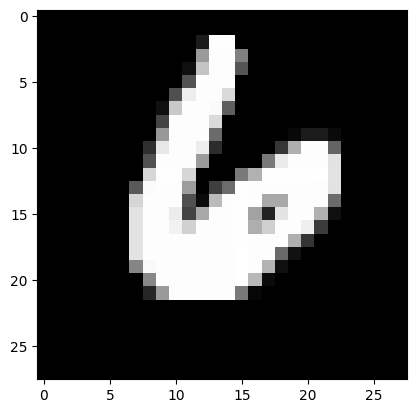

Real mark:  6
NN answer:  6


In [ ]:
# вывод тестового изображения и результата распознавания
n = 3
result = model.predict(X_test[n:n+1])
print('NN output:', result)
plt.imshow(X_test[n].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()
print('Real mark: ', str(np.argmax(y_test[n])))
print('NN answer: ', str(np.argmax(result)))


In [ ]:
# загрузка собственного изображения
from PIL import Image
file_data = Image.open('/content/test.png')
file_data = file_data.convert('L') # перевод в градации серого
test_img = np.array(file_data)


In [ ]:
# загрузка собственного изображения
from PIL import Image
file_data1 = Image.open('/content/test1.png')
file_data1 = file_data1.convert('L') # перевод в градации серого
test_img1 = np.array(file_data1)

# Новый раздел

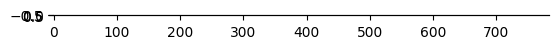

1/1 [==============================] - 0s 18ms/step
I think it's  5


In [ ]:
# вывод собственного изображения
plt.imshow(test_img, cmap=plt.get_cmap('gray'))
plt.show()
# предобработка
test_img = test_img / 255
test_img = test_img.reshape(1, num_pixels)
# распознавание
result = model.predict(test_img)
print('I think it\'s ', np.argmax(result))

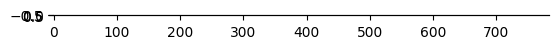

1/1 [==============================] - 0s 27ms/step
I think it's  5


In [ ]:
# вывод собственного изображения
plt.imshow(test_img1, cmap=plt.get_cmap('gray'))
plt.show()
# предобработка
test_img1 = test_img1 / 255
test_img1 = test_img1.reshape(1, num_pixels)
# распознавание
result = model.predict(test_img1)
print('I think it\'s ', np.argmax(result))

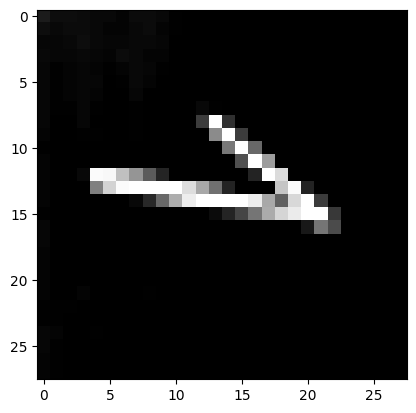

1/1 [==============================] - 0s 25ms/step
I think it's  4


In [ ]:
# загрузка собственного перевернутого изображения
from PIL import Image
file_data1 = Image.open('/content/test_90.png')
file_data1 = file_data1.convert('L') # перевод в градации серого
test_img1 = np.array(file_data1)

# вывод собственного изображения
plt.imshow(test_img1, cmap=plt.get_cmap('gray'))
plt.show()
# предобработка
test_img1 = test_img1 / 255
test_img1 = test_img1.reshape(1, num_pixels)
# распознавание
result = model.predict(test_img1)
print('I think it\'s ', np.argmax(result))

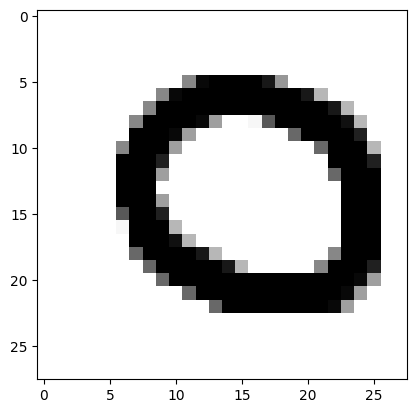

1/1 [==============================] - 0s 21ms/step
I think it's  3


In [ ]:
# загрузка собственного изображения
from PIL import Image
file_data = Image.open('/content/test1_90.png')
file_data = file_data.convert('L') # перевод в градации серого
test_img = np.array(file_data)

# вывод собственного изображения
plt.imshow(test_img, cmap=plt.get_cmap('gray'))
plt.show()
# предобработка
test_img = test_img / 255
test_img = test_img.reshape(1, num_pixels)
# распознавание
result = model.predict(test_img)
print('I think it\'s ', np.argmax(result))

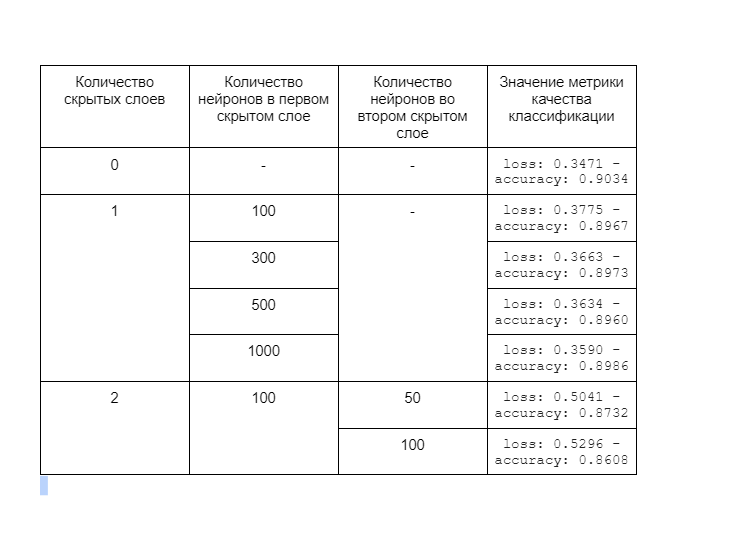